In [12]:
from cognipy.ontology import Ontology #the ontology processing class
from cognipy.ontology import CQL #SPARQL format tailored for Contolled Natural Language
from cognipy.ontology import encode_string_for_graph_label #complex datatypes encoder for the graph labels in graph visualisation
import textwrap

def graph_attribute_formatter(val):
    if isinstance(val,list) or isinstance(val,set):
        return " | ".join(list(map(lambda i:encode_string_for_graph_label(graph_attribute_formatter(i)),val)))
    elif isinstance(val,dict):
        return " | ".join(list(map(lambda i:i[0]+" : "+encode_string_for_graph_label(graph_attribute_formatter(i[1])),val.items())))
    else:
        return encode_string_for_graph_label(textwrap.fill(str(val),40))


In [21]:
import pandas as pd

df = pd.read_csv("data_0.csv")
# turn From Bank from int to string
df["From Bank"] = df["From Bank"].astype(str)
df["To Bank"] = df["To Bank"].astype(str)

In [22]:
df.head()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:20,867,802EAE130,27,824EA5E10,47.56,UK Pound,47.56,UK Pound,Credit Card,0
1,2022/09/01 00:03,27,815EF3050,27,815EF3050,30485.07,US Dollar,2238945.42,Rupee,ACH,0
2,2022/09/01 00:03,27,815EF3050,63750,8208CBCE0,30485.07,US Dollar,30485.07,US Dollar,Cheque,0
3,2022/09/01 00:23,27,815EF3050,27,815EF3050,21478.19,US Dollar,1577443.89,Rupee,ACH,0
4,2022/09/01 00:23,27,815EF3050,63750,8208CBCE0,21478.19,US Dollar,21478.19,US Dollar,Cash,0


In [16]:
test_str = """867 is a Bank
802EAE130 is an Account of 867"""

In [17]:
onto=Ontology("cnl/string", test_str)
onto.draw_graph(layout='force directed',show={"relations"})


ParseException: {'Errors': [{'Line': 0, 'Column': 0, 'Pos': 0, 'Context': '867 is a Bank\n802EAE130 is an Account of 867', 'Hint': '8^67 is a Bank\n802EAE130 is an Account of 86'}]}

In [ ]:
def transaction_to_cnl(row):
    """
    Controlled Natural Language

    row has following attributes:
    - Timestamp
    - From Bank
    - Amount
    """
    lines = []
    if row.Name==row.Name: #Nan check
        if row.Orbits!='-':
            lines.append(f"{row.Name} orbits {row.Orbits}.")
            lines.append(f"{row.Name} has-index equal-to '{row['#']}'.")
            if row['Distance (000 km)']==row['Distance (000 km)']:
                lines.append(f"{row.Name} has-semimajor-axis-1000-km equal-to {renum(row['Distance (000 km)'])}.")
            if row['O_Period (days)']==row['O_Period (days)']:
                lines.append(f"{row.Name} has-period equal-to {renum(row['O_Period (days)'])}.")
            if row['Eccen']==row['Eccen']:
                lines.append(f"{row.Name} has-eccentricity equal-to {renum(row['Eccen'])}.")
            if row.Discoverer!='-':
                lines.append(f"{row.Name} has-discoverer equal-to '{row.Discoverer.split('(')[0]}'.")
                lines.append(f"{row.Name} has-discovery-year equal-to {row.Date}.")
    return '\n'.join(lines)


In [27]:
import pandas as pd
import networkx as nx


# Create a directed graph (DiGraph) using NetworkX
G = nx.DiGraph()

# Iterate through the DataFrame rows and add nodes and edges to the graph
for index, row in df[:100].iterrows():
    from_account = row['From Bank'] + "_" + row['Account']
    to_account = row['To Bank'] + "_" + row['Account.1']
    amount = row['Amount Paid']
    
    G.add_node(from_account)
    G.add_node(to_account)
    G.add_edge(from_account, to_account, amount=amount)

# Now, you have your DataFrame as an in-memory graph in NetworkX (G).


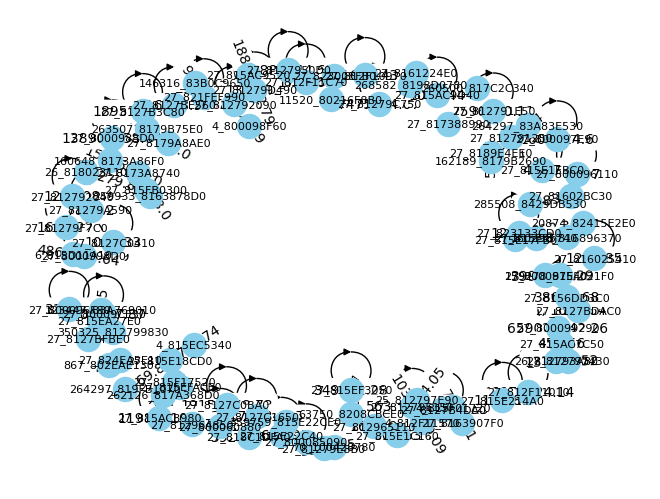

In [28]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you have already created the graph 'G' from your DataFrame

# Create a layout for the nodes (you can choose different layouts)
layout = nx.spring_layout(G)

# Draw the graph
nx.draw(G, pos=layout, with_labels=True, node_size=300, node_color='skyblue', font_size=8, font_color='black')

# Add edge labels (amount paid)
edge_labels = nx.get_edge_attributes(G, 'amount')
nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=edge_labels)

# Show the plot
plt.show()